* To calculate potential energy of each forcing case.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,psu_tools)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
sites = {'Sandheads': {'lat': 49.10,'lon': -123.30,'j' : 46,'i' : 53}}
maxdensity = 1023.0
mindensity = 999.7

In [3]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

In [4]:
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
e3t = mesh.variables['e3t'][0,:,380:510,240:397]
gdepT = mesh.variables['gdept'][0,:,380:510,240:397]

In [5]:
river_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
river_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
river_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')

river_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
river_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
river_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')

river_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')
river_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_U.nc')
river_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_V.nc')

In [6]:
notide_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
notide_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
notide_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')

notide_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')
notide_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')
notide_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')

notide_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')
notide_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_U.nc')
notide_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_V.nc')

In [7]:
nowind_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
nowind_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
nowind_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')

nowind_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
nowind_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
nowind_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')

nowind_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')
nowind_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')
nowind_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

In [8]:
all_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
all_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
all_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')

all_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
all_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
all_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')

all_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')
all_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')
all_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

# Method

In [9]:
def calculate_PE(gridTs,strings,stn,mesh,e3t,gdepT,z_depths,maxdensity,mindensity):
    """
    Calculate potential energy at specific station. 
    
    gridTs: list of gridT files for each forcing case
    
    strings: corresponding gridT strings
    
    stn: Station name to plot
    
    mesh: mesh file needed for tmask
    
    e3t: vertical spacing 
    
    gdepT: depth level for gridT 
    
    z_depths: specific depth level to integral
    """
    S = {}; T = {};rho = {}; PE = {} ;
    unmixed_PE = {}
    g = 9.80665                                                 
    for gridT,string in zip(gridTs,strings):
        S[string] = gridT.variables['vosaline']
        T[string] = gridT.variables['votemper']
        dep_T = gridT.variables['deptht']
        PE[string] = np.zeros([S[string].shape[0], z_depths])
        unmixed_PE[string] = np.zeros([S[string].shape[0], z_depths])
        
        tmask = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask) 
        np_mask=np_mask +np.zeros(S[string][:,:,sites[stn]['j'],sites[stn]['i']].shape) 
        S[string] = np.ma.masked_array(S[string][:,:,sites[stn]['j'],sites[stn]['i']],mask=np_mask)
        T[string] = np.ma.masked_array(T[string][:,:,sites[stn]['j'],sites[stn]['i']],mask=np_mask)
        rho[string] = psu_tools.calculate_density(T[string],S[string])
        average_density = np.nanmean(rho[string][:,0:z_depths], axis = 1) ## only average the selected depth's density
        for z in range(z_depths):
            PE[string][:,z] = -g* (rho[string][:,z] -  average_density)* gdepT[z,sites[stn]['j'],sites[stn]['i']] \
            * e3t[z,sites[stn]['j'],sites[stn]['i']]          
            
        PE[string] =np.sum(PE[string],axis=1) 
        unmixed_ell = (maxdensity - average_density)/(maxdensity - mindensity) * z_depths
        unmixed_PE[string] = (- 0.5 * g * (mindensity - average_density) * unmixed_ell**2
              - 0.5 * g * (maxdensity - average_density) * (z_depths - unmixed_ell) * (z_depths + unmixed_ell))
        
        
    return PE, unmixed_PE

In [10]:
## PE
PE_may_latest,unmixed_may = calculate_PE([river_T_may,notide_T_may,nowind_T_may,all_T_may],['river','river+winds','river+tides','all'],\
                 'Sandheads',mesh,e3t,gdepT,10,maxdensity,mindensity)
PE_oct_latest,unmixed_oct  = calculate_PE([river_T_oct,notide_T_oct,nowind_T_oct,all_T_oct],['river','river+winds','river+tides','all'],\
                 'Sandheads',mesh,e3t,gdepT,10,maxdensity,mindensity)
PE_jan_latest,unmixed_jan  = calculate_PE([river_T_jan,notide_T_jan,nowind_T_jan,all_T_jan],['river','river+winds','river+tides','all'],\
                 'Sandheads',mesh,e3t,gdepT,10,maxdensity,mindensity)

# Plot 1

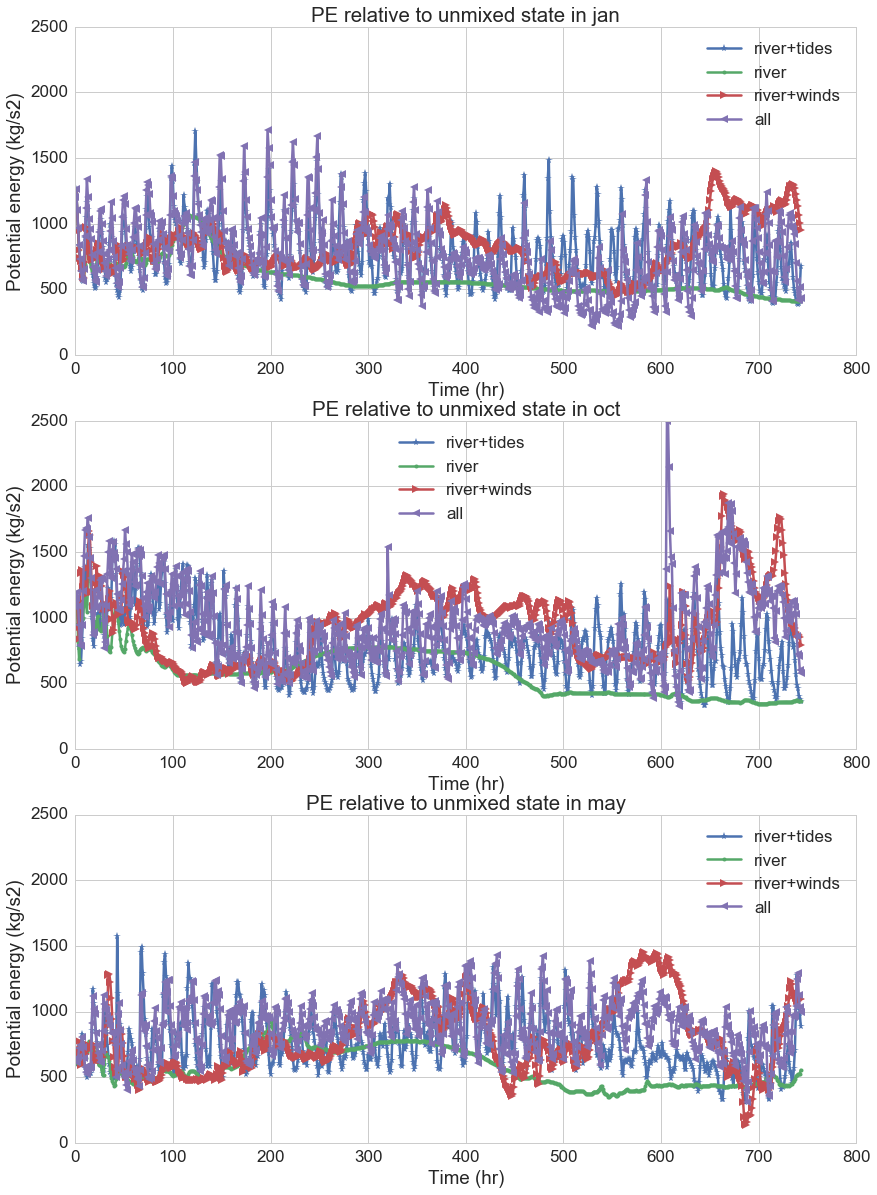

In [11]:
fig, axs = plt.subplots(3,1,figsize = (14,20))
mars = ['*','.','>','<']
for ax, PE, unmix in zip(axs,[PE_jan_latest,PE_oct_latest,PE_may_latest],
                        [unmixed_jan,unmixed_oct,unmixed_may]):
    for key, mar in zip(PE.keys(), mars):
        ax.plot(PE[key]-unmix[key],label = key, marker = mar,markersize = 8)
        ax.legend(loc = 'best')
    ax.set_xlabel('Time (hr)')
    ax.set_ylabel('Potential energy (kg/s2)')
for ax, mon in zip(axs,['jan','oct','may']):
    ax.set_ylim([0,2500])
    ax.set_title('PE relative to unmixed state in ' + mon)

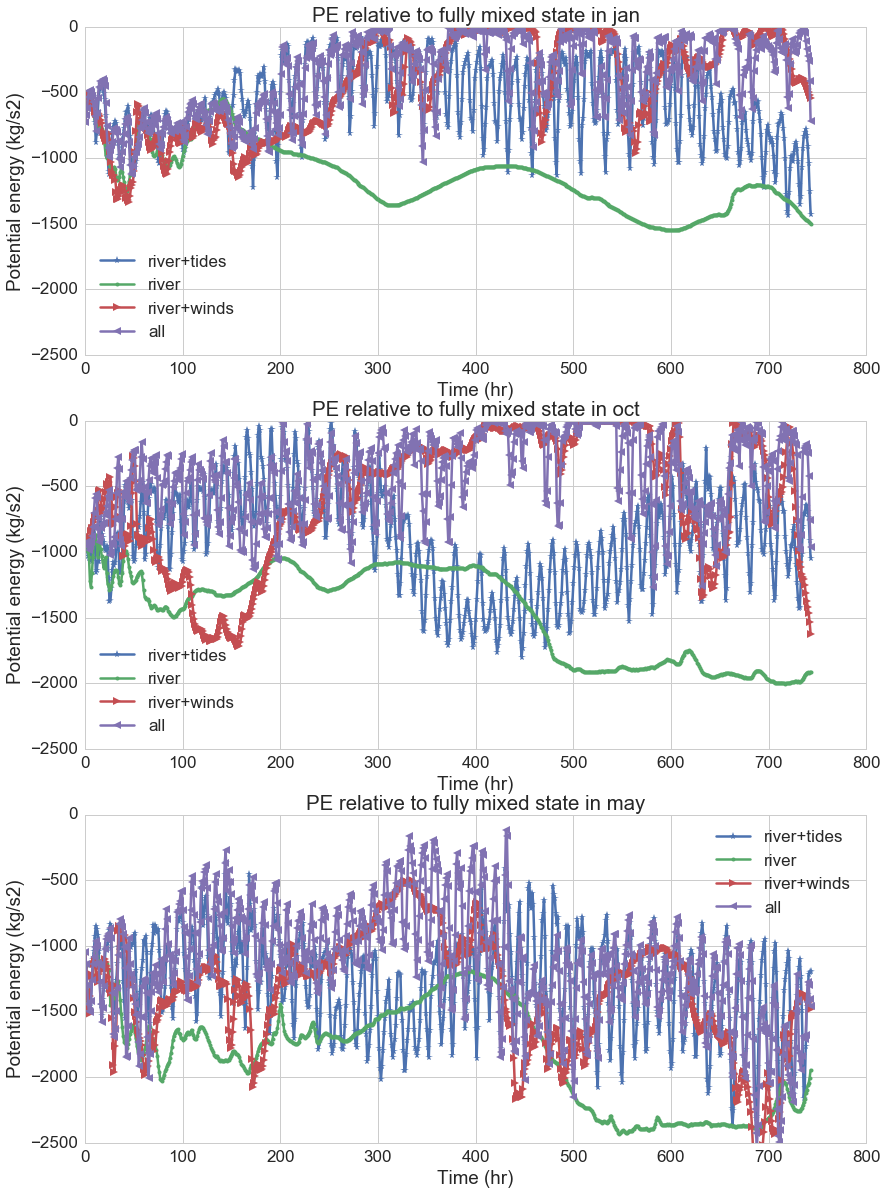

In [12]:
fig, axs = plt.subplots(3,1,figsize = (14,20))
mars = ['*','.','>','<']
for ax, PE in zip(axs,[PE_jan_latest,PE_oct_latest,PE_may_latest]):
    for key, mar in zip(PE.keys(), mars):
        ax.plot(PE[key],label = key, marker = mar,markersize = 8)
        ax.legend(loc = 'best')
    ax.set_xlabel('Time (hr)')
    ax.set_ylabel('Potential energy (kg/s2)')
for ax, mon in zip(axs,['jan','oct','may']):
    ax.set_ylim([-2500,0])
    ax.set_title('PE relative to fully mixed state in ' + mon)

In [13]:
def plot_stra_allflows_Extra(stn,dep_ind,grid_T_jan,grid_T_oct,grid_T_may,start1,end1,start2,end2,start3,end3,\
                      smin = 0,smax = 36):
    """Plot the salinity stratification for different river flows and all cases"""
    S_stn_jan={};S_stn_oct={};S_stn_may={};
    
    for grid_Tjan,grid_Toct,grid_Tmay,st in zip(grid_T_jan,grid_T_oct,grid_T_may,['river','river+tides','river+winds',\
                                                                                  'river+winds+tides']):
        S1 = grid_Tjan.variables['vosaline']
        S2 = grid_Toct.variables['vosaline']
        S3 = grid_Tmay.variables['vosaline'] 
        t = grid_Toct.variables['time_counter']
        dep_T = grid_Toct.variables['deptht']
        S_stn_jan[st] = S1[:,:,sites[stn]['j'],sites[stn]['i']]
        S_stn_oct[st] = S2[:,:,sites[stn]['j'],sites[stn]['i']]
        S_stn_may[st] = S3[:,:,sites[stn]['j'],sites[stn]['i']]       
        ## tmask
        mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
        tmask = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask) 
        np_mask=np_mask +np.zeros(S_stn_oct[st].shape) 
        S_stn_jan[st] = np.ma.masked_array(S_stn_jan[st],mask=np_mask)
        S_stn_oct[st] = np.ma.masked_array(S_stn_oct[st],mask=np_mask) ## mask sal=0 by tmask
        S_stn_may[st] = np.ma.masked_array(S_stn_may[st],mask=np_mask)
        
        time_inds = np.arange(S1.shape[0]) ## Define time
    fig, axs = plt.subplots(4,3,figsize = (19,22))
    listA = ['a.','b.','c.','d.']
    listB = ['e.','f.','g.','h.']
    listC = ['i.','j.','k.','l.']
    
    for ax1 ,ax2, ax3, st,LA,LB,LC in zip(axs[:,0], axs[:,1], axs[:,2], ['river','river+tides','river+winds',\
                                                                                  'river+winds+tides'],\
                                    listA,listB,listC):
        mesh1 = ax1.contourf(time_inds, dep_T[:],np.transpose(S_stn_jan[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        ax1.text(0.02,0.02, LA+' Jan '+st,transform = ax1.transAxes,fontsize = 20, color = 'k')
        cbar=fig.colorbar(mesh1,ax = ax1)
        cbar.set_label('Practical Salinity')
        ax1.set_xlim(time_inds[start1],time_inds[end1])
        mesh2 = ax2.contourf(time_inds, dep_T[:],np.transpose(S_stn_oct[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        ax2.text(0.02,0.02, LB+' Oct '+st,transform = ax2.transAxes,fontsize = 20, color = 'k')
        cbar=fig.colorbar(mesh2,ax = ax2)
        cbar.set_label('Practical Salinity')
        ax2.set_xlim(time_inds[start2],time_inds[end2])
        mesh3 = ax3.contourf(time_inds, dep_T[:],np.transpose(S_stn_may[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        ax3.text(0.02,0.02, LC +' May '+st,transform = ax3.transAxes,fontsize = 20, color = 'k')
        cbar=fig.colorbar(mesh3,ax = ax3)
        cbar.set_label('Practical Salinity')
        ax3.set_xlim(time_inds[start3],time_inds[end3])
        
        for ax in [ax1,ax2,ax3]:
            ax.set_ylim([dep_T[dep_ind], dep_T[0]])
            ax.set_ylabel('Depth [m]')
    for ax in [axs[-1,0],axs[-1,1],axs[-1,2]]:
        ax.set_xlabel('Time [hour]')

# Plot 2

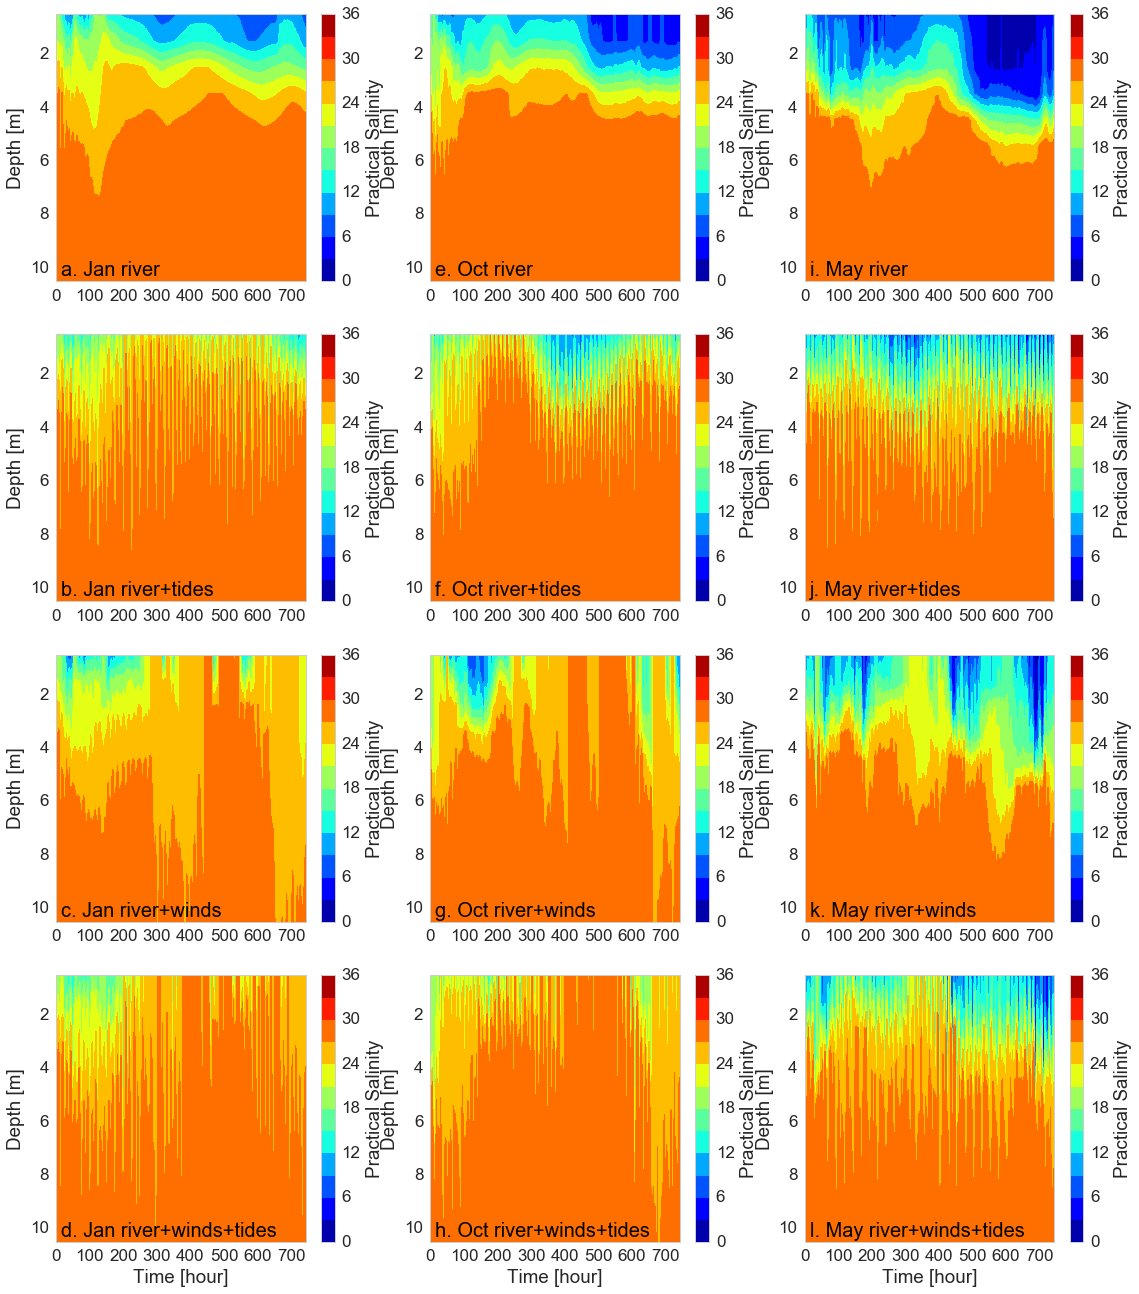

In [14]:
grid_T_jan = [river_T_jan,nowind_T_jan,notide_T_jan,all_T_jan]
grid_T_oct = [river_T_oct,nowind_T_oct,notide_T_oct,all_T_oct]
grid_T_may = [river_T_may,nowind_T_may,notide_T_may,all_T_may]
plot_stra_allflows_Extra('Sandheads',10,grid_T_jan,grid_T_oct,grid_T_may,0,743,0,743,0,743)